<div style="line-height:0.5">
<h1 style="color:#EC804A "> Logistic regression trials 1 </h1>
<h4> Logistic regression classification and Comparison with KNN. </h4> 
<div style="margin-top: -6px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> Grid Search  + of out-of-sample accuracy + register_line_cell_magic + matplotlib contourf
</span>
</div>

In [34]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics  import accuracy_score, roc_curve, roc_auc_score

from IPython.core.magic import register_line_cell_magic

from mpl_toolkits.mplot3d import Axes3D

In [2]:
## Create a toy dataset with 3 features and 2 classes
X = np.random.rand(100, 3)
y = np.random.randint(0, 2, 100)
## Convert the data to a pandas DataFrame
data = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3'])
data['class'] = y
## Split the data into input features and target variable
X = data.drop('class', axis=1)
y = data['class']

logreg = LogisticRegression(solver='liblinear')

# Fit the model with data (learn)
logreg.fit(X, y)
# Predict the response values for the observations in X
y_pred = logreg.predict(X)

print(len(y_pred))

print(logreg.classes_)
print(logreg.coef_)
print(logreg.feature_names_in_)

100
[0 1]
[[-0.55929224 -0.26441943 -0.15578665]]
['feature_1' 'feature_2' 'feature_3']


In [3]:
## Instantiate the model
logreg = LogisticRegression(solver='liblinear')

## Fit the model with data
logreg.fit(X, y)
## Predict the response values for the observations in X
logreg.predict(X)
## Store the predicted response values
y_pred = logreg.predict(X)

## Compute classification accuracy for the logistic regression model
print(f"accuracy_score(y, y_pred) {accuracy_score(y, y_pred)}")

## Check how many predictions were generated
len(y_pred)

accuracy_score(y, y_pred) 0.53


100

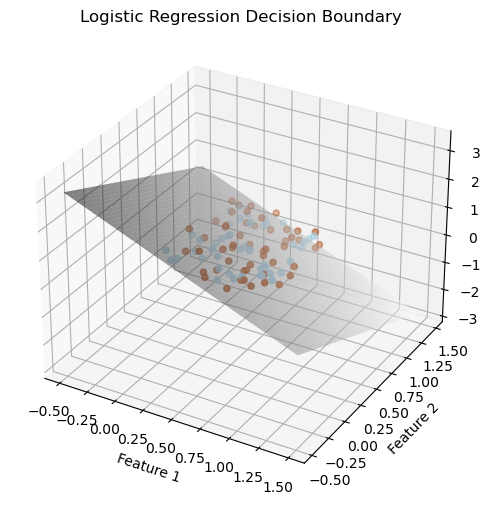

In [30]:
## Convert the data to a pandas DataFrame
data = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3'])
data['class'] = y
## Split the data into input features and target variable
X = data.drop('class', axis=1)
y = data['class']

## Instantiate the logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Fit the model with data
logreg.fit(X, y)

# Predict the response values for the observations in X
y_pred = logreg.predict(X)

##### Define the range and step size for the input feature space --> using iloc is fundamental!
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
z_min, z_max = X.iloc[:, 2].min() - .5, X.iloc[:, 2].max() + .5
h = .02

## Create a meshgrid of the input feature space
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zz = np.zeros(xx.shape)

###### Compute the decision boundary for the logistic regression model
w = logreg.coef_[0]
a = -w[0] / w[2]
b = -w[1] / w[2]
c = -logreg.intercept_ / w[2]
zz = a * xx + b * yy + c

####### Plot the decision boundary and the input data
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y, cmap=plt.cm.Paired)
ax.plot_surface(xx, yy, zz, cmap='binary', alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Logistic Regression Decision Boundary')
plt.show()

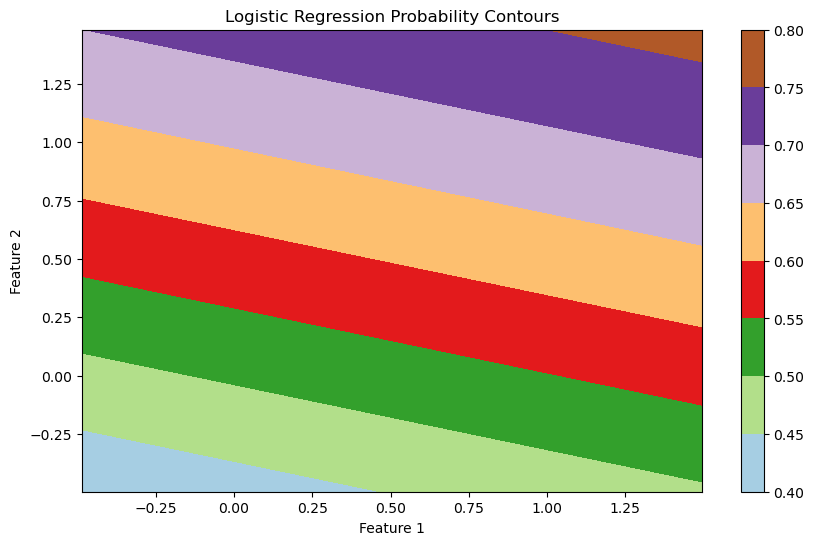

In [32]:
# Create a meshgrid of the input feature space
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Predict the probability of the positive class for each point in the input feature space
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

####### Plot the probability contours
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Probability Contours')
plt.show()

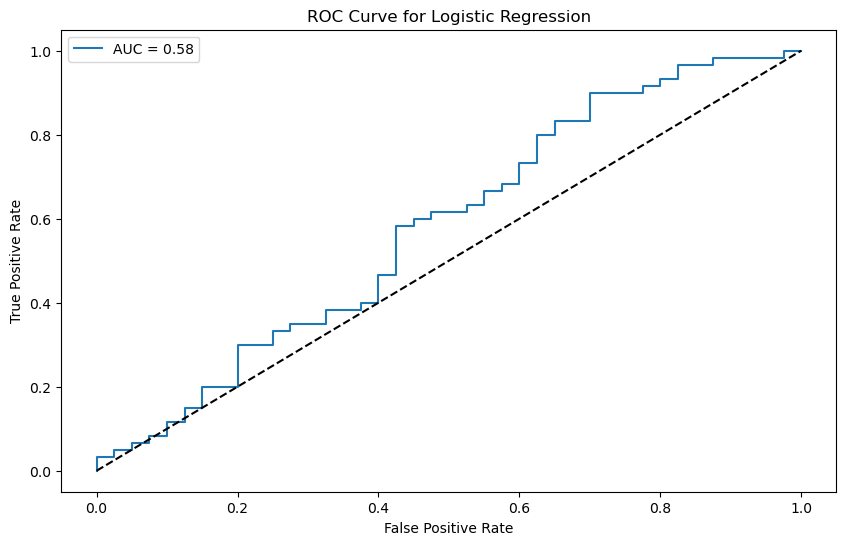

In [33]:
# Predict the probability of the positive class for each point in the input feature space
y_prob = logreg.predict_proba(X)[:, 1]
# Compute the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Compute the area under the ROC curve
auc = roc_auc_score(y, y_prob)

######## Display the ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

<div style="line-height:0.5">
<h2 style="color:#EC804A"> 2) KNN comparison </h2>
Classifier implementing the k-nearest neighbors vote
</div>

In [4]:
## k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"metrics.accuracy_score(y, y_pred) {accuracy_score(y, y_pred)}")

## k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"metrics.accuracy_score(y, y_pred) {accuracy_score(y, y_pred)}")

metrics.accuracy_score(y, y_pred) 1.0
metrics.accuracy_score(y, y_pred) 0.71


In [5]:
""" Split into train and test subset """
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

print(f"X.shape {X.shape}")
print(f"y.shape {y.shape}")
print("y_train.shape {y_train.shape}")
print("y_test.shape {y_test.shape}")

X.shape (100, 3)
y.shape (100,)
y_train.shape {y_train.shape}
y_test.shape {y_test.shape}


In [6]:
""" Find best k value """
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(f"For k = {k} the accuracy_score(y_test, y_pred) is: {accuracy_score(y_test, y_pred)}")

#### Extract the numerical accuracy values from each string in the list
scores_reduced = [] 
for score in scores:
    scor = score.split(':')[-1].strip()
    scores_reduced.append(float(scor))

print("Extracted accuracy values:")
print(scores)
print(scores_reduced)

Extracted accuracy values:
['For k = 1 the accuracy_score(y_test, y_pred) is: 0.6', 'For k = 2 the accuracy_score(y_test, y_pred) is: 0.575', 'For k = 3 the accuracy_score(y_test, y_pred) is: 0.525', 'For k = 4 the accuracy_score(y_test, y_pred) is: 0.6', 'For k = 5 the accuracy_score(y_test, y_pred) is: 0.525', 'For k = 6 the accuracy_score(y_test, y_pred) is: 0.625', 'For k = 7 the accuracy_score(y_test, y_pred) is: 0.575', 'For k = 8 the accuracy_score(y_test, y_pred) is: 0.55', 'For k = 9 the accuracy_score(y_test, y_pred) is: 0.55', 'For k = 10 the accuracy_score(y_test, y_pred) is: 0.575', 'For k = 11 the accuracy_score(y_test, y_pred) is: 0.575', 'For k = 12 the accuracy_score(y_test, y_pred) is: 0.6', 'For k = 13 the accuracy_score(y_test, y_pred) is: 0.575', 'For k = 14 the accuracy_score(y_test, y_pred) is: 0.6', 'For k = 15 the accuracy_score(y_test, y_pred) is: 0.6', 'For k = 16 the accuracy_score(y_test, y_pred) is: 0.575', 'For k = 17 the accuracy_score(y_test, y_pred) is

Text(0, 0.5, 'Testing Accuracy')

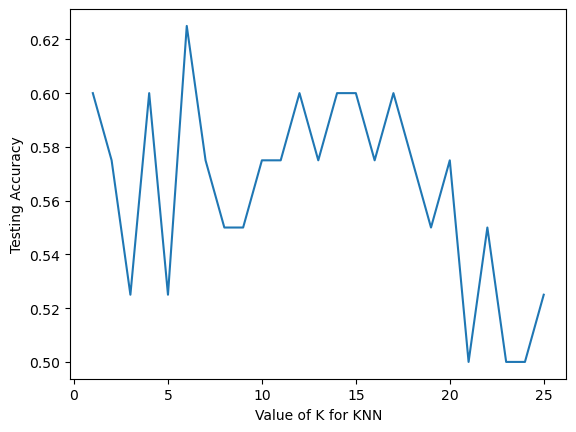

In [7]:
#%matplotlib inline  ## allow plots to appear within the notebook, useless in Vscode
plt.plot(k_range, scores_reduced)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

The best k value is: 4
The corresponding accuracy score is: 0.5900000000000001


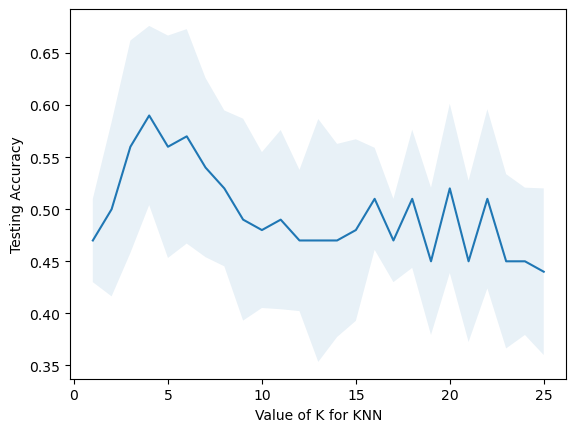

In [8]:
## Define the parameter grid for k values
param_grid = {'n_neighbors': range(1, 26)}

## Instantiate the KNN classifier
knn = KNeighborsClassifier()

## Instantiate the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

## Show the best k value and its corresponding accuracy score
print(f"The best k value is: {grid_search.best_params_['n_neighbors']}")
print(f"The corresponding accuracy score is: {grid_search.best_score_}")

## Extract the mean test scores and standard deviations for each value of k
mean_test_scores = grid_search.cv_results_['mean_test_score']
std_test_scores = grid_search.cv_results_['std_test_score']

###### Display the relationship between k and testing accuracy
k_range = range(1, 26)
scores_reduced = np.array(mean_test_scores)
plt.plot(k_range, scores_reduced)
plt.fill_between(k_range, scores_reduced - std_test_scores, scores_reduced + std_test_scores, alpha=0.1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

- **Training accuracy** rises as model complexity increases
- **Testing accuracy** penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the **value of K** (lower value = more complex)

In [9]:
##### Define the hyperparameters for GridSearchCV
grid_params = {'estimator': KNeighborsClassifier(),
                'param_grid': param_grid,
                'cv': 5,
                'scoring': 'accuracy',
                'verbose': 1,
                'n_jobs': -1}

# Instantiate the GridSearchCV object with hyperparameters
grid_search = GridSearchCV(**grid_params)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

## Show the best k value and its corresponding accuracy score
print(f"The best k value is: {grid_search.best_params_['n_neighbors']}")
print(f"The corresponding accuracy score is: {grid_search.best_score_}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
The best k value is: 4
The corresponding accuracy score is: 0.5900000000000001


In [10]:
type(y)
z = y.to_frame()
z


,class
0,0
1,0
2,0
3,1
4,0
...,...
95,0
96,1
97,0
98,0


<div style="line-height:0.5">
<h2 style="color:#EC804A"> 3) Out of sample data </h2>
Providing a high-variance estimate of out-of-sample accuracy
</div>

In [11]:
## Avoid annoying warning
warnings.filterwarnings('ignore', message='X does not have valid feature names, but KNeighborsClassifier was fitted with feature names')

## Uee the Model with the best known parameters
knn1 = KNeighborsClassifier(n_neighbors=11)

## Train the model with X and y (not X_train and y_train!)
## X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
knn1.fit(X, y)
# Make a prediction for an out-of-sample observation
pred = knn1.predict([[3, 5, 4]])

print(f"X.shape {X.shape}")
print(f"predicted class => {pred}")


X.shape (100, 3)
predicted class => [0]


In [12]:
""" Ignoring in a different way"""

@register_line_cell_magic
def ignore_warnings(line, cell=None):
    import warnings
    warnings.filterwarnings('ignore')
    if cell is not None:
        get_ipython().run_cell(cell)        

In [13]:
%ignore_warnings

## Get the Model with the best known parameters
knn1 = KNeighborsClassifier(n_neighbors=11)

## Train the model with X and y (not X_train and y_train!)
## X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
knn1.fit(X, y)
# Make a prediction for an out-of-sample observation
pred = knn1.predict([[3, 5, 4]])

print(f"X.shape {X.shape}")
print(f"predicted class => {pred}")

X.shape (100, 3)
predicted class => [0]
